In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.interpolate import interp1d
from scipy.ndimage import gaussian_filter
import pickle
from scipy.signal import convolve


In [8]:
speeds = [0.27,0.81,1.62,3.24,0.1,0.2,0.4,0.5,0.6,0.7,0.8,0.9,1.0]


In [9]:
data4 = []
cell = 150

for s in speeds: 
    print(s)
    fp = f'/user/sebert/home/Documents/Simulations/motion/anticipation_1D/Reciporcal/Reciporcal_fitted_linear/wBA/wBA_31.0/smooth_{s}'
    with open(f'{fp}/out', 'rb') as handle:
        out = pickle.load(handle)    
        
    with open(f'{fp}/params', 'rb') as handle:
        paramsi = pickle.load(handle)

    duration = paramsi['duration']
    dt = paramsi['dt']
    #time = (np.arange(0,duration,dt)- params['tps_rf_GC_mid'][50])*1000
    time = (np.arange(0,duration,dt) - (paramsi['spacing']*cell)/paramsi['speed'])*1000#+45
    data4.append([time,out['RG'][:]])

    if s == 0.81:
        outd4 = out

0.27


0.81
1.62
3.24
0.1
0.2
0.4
0.5
0.6
0.7
0.8
0.9
1.0


In [10]:
s = 1.0
fp = f'/user/sebert/home/Documents/Simulations/motion/anticipation_1D/Reciporcal/Reciporcal_fitted_linear/noGCGainControl/wBA/wBA_0.0/smooth_{s}'
with open(f'{fp}/out', 'rb') as handle:
    outdp7 = pickle.load(handle)   
    
with open(f'{fp}/out', 'rb') as handle:
    params7 = pickle.load(handle)   

fp = f'/user/sebert/home/Documents/Simulations/motion/anticipation_1D/Reciporcal/Reciporcal_fitted_linear/noGCGainControl/wBA/wBA_31.0/smooth_{s}'
with open(f'{fp}/out', 'rb') as handle:
    outd7 = pickle.load(handle)  


fp = f'/user/sebert/home/Documents/Simulations/motion/anticipation_1D/Reciporcal/Reciporcal_fitted/noGCGainControl/wBA/wBA_0.0/smooth_{s}'
with open(f'{fp}/out', 'rb') as handle:
    outdp8 = pickle.load(handle)  


fp = f'/user/sebert/home/Documents/Simulations/motion/anticipation_1D/Reciporcal/Reciporcal_fitted/noGCGainControl/wBA/wBA_31.0/smooth_{s}'
with open(f'{fp}/out', 'rb') as handle:
    outd8 = pickle.load(handle)  



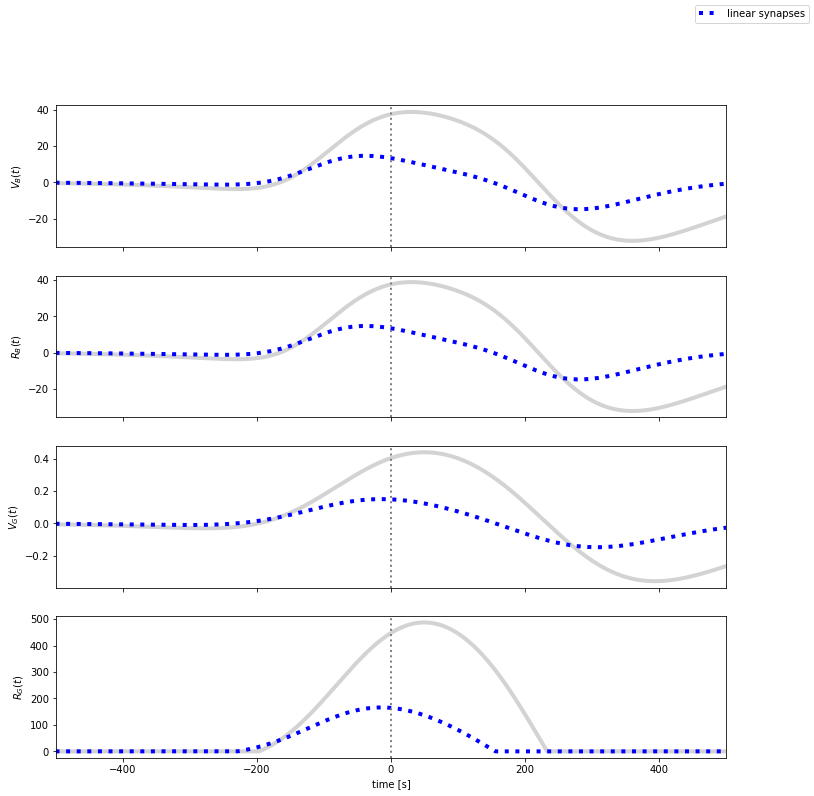

In [11]:
lw = 4
c1 = 'green'
c2 = 'blue'


fig,ax = plt.subplots(4,1,  figsize = (12,12), sharex = 'col', sharey = 'row')






ax[0].plot(data4[-1][0],outdp7['VB'][50,:], color = 'lightgrey', linewidth = lw)
ax[0].plot(data4[-1][0],outd7['VB'][50,:], color = c2, linewidth = lw, linestyle = ':', label = 'linear synapses')

ax[1].plot(data4[-1][0],outdp7['RB'][50,:], color = 'lightgrey', linewidth = lw)
ax[1].plot(data4[-1][0], outd7['RB'][50,:], color = c2, linewidth = lw, linestyle = ':')


ax[2].plot(data4[-1][0],outdp7['VG'][:], color = 'lightgrey', linewidth = lw)
ax[2].plot(data4[-1][0],outd7['VG'][:], color = c2, linewidth = lw, linestyle = ':')

ax[3].plot(data4[-1][0],outdp7['RG'][:], color = 'lightgrey', linewidth = lw)
ax[3].plot(data4[-1][0], outd7['RG'][:], color = c2, linewidth = lw, linestyle = ':')




ax[0].set_ylabel('$V_{B}(t)$')
#ax[0].plot(data4[1][0],outdp8['VB'][50,:], color = 'lightgrey', linewidth = lw)
#ax[0].plot(data4[1][0],outd8['VB'][50,:], color = c1, linewidth = lw, label = 'rectified synapses')

ax[1].set_ylabel('$R_{B}(t)$')
#ax[1].plot(data4[1][0],outdp8['RB'][50,:], color = 'lightgrey', linewidth = lw)
#ax[1].plot(data4[1][0], outd8['RB'][50,:], color = c1, linewidth = lw)

#ax[2,0].plot(data[1][0],outd['RB'][300,:]- outdp['RB'][300,:], color = 'green', linestyle = ':')

ax[2].set_ylabel('$V_{G}(t)$')
#ax[2].plot(data4[1][0],outdp8['VG'][:], color = 'grey')
#ax[2].plot(data4[1][0], outd8['VG'][:], color = c1, linewidth = lw)

ax[3].set_ylabel('$R_{G}(t)$')
#ax[3].plot(data4[1][0],outdp8['RG'][:], color = 'grey')
#ax[3].plot(data4[1][0], outd8['RG'][:], color = c1, linewidth = lw)



ax[0].axvline(0,linestyle = ':', color = 'grey', linewidth =2 )
ax[1].axvline(0,linestyle = ':', color = 'grey', linewidth =2 )
ax[2].axvline(0,linestyle = ':', color = 'grey', linewidth =2 )
ax[3].axvline(0,linestyle = ':', color = 'grey', linewidth =2 )


ax[-1].set_xlabel ('time [s]')
ax[-1].set_xlim(-500,500)

fig.legend()

